In [1]:
import pandas as pd
import matplotlib as mp

C:\Users\PC\AppData\Local\Temp\ipykernel_17656\2910930661.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
weather = pd.read_csv("IndianWeatherRepository1.csv", index_col="last_updated")

In [3]:
weather.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2023-08-29 10:45,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,27.5,81.5,Partly cloudy,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
2023-08-29 10:45,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,27.5,81.5,Sunny,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2023-08-29 10:45,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,26.3,79.3,Partly cloudy,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
2023-08-29 10:45,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,25.6,78.1,Cloudy,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
2023-08-29 10:45,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,27.2,81.0,Cloudy,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

country                         0.0
location_name                   0.0
region                          0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0.0
air_quality_Carbon_Monoxide 

In [5]:
core_weather = weather[["temperature_celsius", "precip_mm", "wind_kph", "pressure_in", "humidity", "cloud", "feels_like_celsius", "visibility_km"]].copy()

In [6]:
core_weather.head()

,temperature_celsius,precip_mm,wind_kph,pressure_in,humidity,cloud,feels_like_celsius,visibility_km
last_updated,,,,,,,,
2023-08-29 10:45,27.5,0.0,20.5,29.77,67,26,29.7,10.0
2023-08-29 10:45,27.5,0.0,15.5,29.78,70,19,30.0,10.0
2023-08-29 10:45,26.3,0.0,18.4,29.78,70,51,28.2,10.0
2023-08-29 10:45,25.6,0.0,16.9,29.80,76,65,27.6,10.0
2023-08-29 10:45,27.2,0.0,16.2,29.79,74,82,29.9,10.0


In [7]:
core_weather.columns = ["temperature", "precipitation", "wind", "pressure", "humidity", "cloud", "feels_like", "visibility"]

In [8]:
core_weather.head()

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,
2023-08-29 10:45,27.5,0.0,20.5,29.77,67,26,29.7,10.0
2023-08-29 10:45,27.5,0.0,15.5,29.78,70,19,30.0,10.0
2023-08-29 10:45,26.3,0.0,18.4,29.78,70,51,28.2,10.0
2023-08-29 10:45,25.6,0.0,16.9,29.80,76,65,27.6,10.0
2023-08-29 10:45,27.2,0.0,16.2,29.79,74,82,29.9,10.0


In [9]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

temperature      0.0
precipitation    0.0
wind             0.0
pressure         0.0
humidity         0.0
cloud            0.0
feels_like       0.0
visibility       0.0
dtype: float64

In [10]:
core_weather["temperature"].value_counts()

temperature
 26.0    1086
 27.0    1031
 25.0     941
 24.0     917
 23.0     635
         ... 
 35.0       1
 34.9       1
-3.8        1
 35.3       1
-3.9        1
Name: count, Length: 408, dtype: int64

In [11]:
core_weather["precipitation"].value_counts()

precipitation
0.00     26041
0.10       789
0.01       554
0.20       425
0.02       306
         ...  
2.19         1
3.36         1
19.72        1
8.96         1
4.34         1
Name: count, Length: 449, dtype: int64

In [12]:
core_weather["wind"].value_counts()

wind
3.6     7060
6.1     1770
6.8     1631
4.0     1373
9.0     1218
        ... 
37.4       1
41.4       1
36.7       1
40.0       1
33.8       1
Name: count, Length: 100, dtype: int64

In [13]:
core_weather["pressure"].value_counts()

pressure
29.68    1379
29.71    1364
29.85    1213
29.65    1155
29.67    1139
         ... 
29.44       1
30.33       1
30.37       1
30.34       1
30.28       1
Name: count, Length: 93, dtype: int64

In [14]:
core_weather["humidity"].value_counts()

humidity
94    2125
89    1757
84    1108
88     926
83     903
      ... 
18       3
15       1
17       1
10       1
16       1
Name: count, Length: 87, dtype: int64

In [15]:
core_weather["cloud"].value_counts()

cloud
0      3951
100    2501
75     1541
50     1468
3      1138
       ... 
91       42
93       42
99       41
98       40
97       39
Name: count, Length: 101, dtype: int64

In [16]:
core_weather["feels_like"].value_counts()

feels_like
 24.6    676
 24.7    578
 24.8    561
 24.9    519
 25.2    513
        ... 
-5.0       1
 38.9      1
-4.4       1
-8.8       1
-8.0       1
Name: count, Length: 476, dtype: int64

In [17]:
core_weather["visibility"].value_counts()

visibility
10.0    25591
2.0      1568
9.0      1533
3.0      1082
4.0       851
0.0       819
5.0       649
2.5       546
7.0       457
3.5       351
6.0       304
3.2       271
2.8       132
2.2        60
4.5        37
2.6        33
2.4        28
8.0        26
2.1        25
1.8        21
1.6        17
2.3        15
1.0        14
1.2        11
1.5         8
2.7         4
0.5         4
1.9         3
0.3         2
1.7         2
0.8         2
Name: count, dtype: int64

In [18]:
core_weather[pd.isnull(core_weather["temperature"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [19]:
core_weather[pd.isnull(core_weather["precipitation"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [20]:
core_weather[pd.isnull(core_weather["wind"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [21]:
core_weather[pd.isnull(core_weather["pressure"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [22]:
core_weather[pd.isnull(core_weather["humidity"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [23]:
core_weather[pd.isnull(core_weather["cloud"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [24]:
core_weather[pd.isnull(core_weather["feels_like"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [25]:
core_weather[pd.isnull(core_weather["visibility"])]

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility
last_updated,,,,,,,,


In [26]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

temperature      0.0
precipitation    0.0
wind             0.0
pressure         0.0
humidity         0.0
cloud            0.0
feels_like       0.0
visibility       0.0
dtype: float64

In [27]:
core_weather.dtypes

temperature      float64
precipitation    float64
wind             float64
pressure         float64
humidity           int64
cloud              int64
feels_like       float64
visibility       float64
dtype: object

In [28]:
core_weather.index

Index(['2023-08-29 10:45', '2023-08-29 10:45', '2023-08-29 10:45',
       '2023-08-29 10:45', '2023-08-29 10:45', '2023-08-29 10:45',
       '2023-08-29 10:45', '2023-08-29 10:45', '2023-08-29 10:45',
       '2023-08-29 10:45',
       ...
       '2023-10-30 02:00', '2023-10-30 02:00', '2023-10-30 02:00',
       '2023-10-30 02:00', '2023-10-30 02:00', '2023-10-30 02:00',
       '2023-10-30 02:00', '2023-10-30 02:00', '2023-10-30 02:00',
       '2023-10-30 02:00'],
      dtype='object', name='last_updated', length=34466)

In [29]:
core_weather.index = pd.to_datetime(core_weather.index)

In [30]:
core_weather.index

DatetimeIndex(['2023-08-29 10:45:00', '2023-08-29 10:45:00',
               '2023-08-29 10:45:00', '2023-08-29 10:45:00',
               '2023-08-29 10:45:00', '2023-08-29 10:45:00',
               '2023-08-29 10:45:00', '2023-08-29 10:45:00',
               '2023-08-29 10:45:00', '2023-08-29 10:45:00',
               ...
               '2023-10-30 02:00:00', '2023-10-30 02:00:00',
               '2023-10-30 02:00:00', '2023-10-30 02:00:00',
               '2023-10-30 02:00:00', '2023-10-30 02:00:00',
               '2023-10-30 02:00:00', '2023-10-30 02:00:00',
               '2023-10-30 02:00:00', '2023-10-30 02:00:00'],
              dtype='datetime64[ns]', name='last_updated', length=34466, freq=None)

In [31]:
core_weather.index.year # type: ignore

Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='last_updated', length=34466)

<Axes: xlabel='last_updated'>

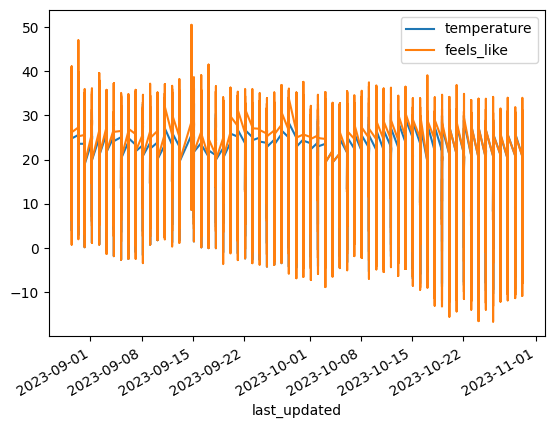

In [32]:
core_weather[["temperature", "feels_like"]].plot()

In [49]:
core_weather.index.month.value_counts().sort_index() # type: ignore

last_updated
8      1643
9     16412
10    16410
Name: count, dtype: int64

<Axes: xlabel='last_updated'>

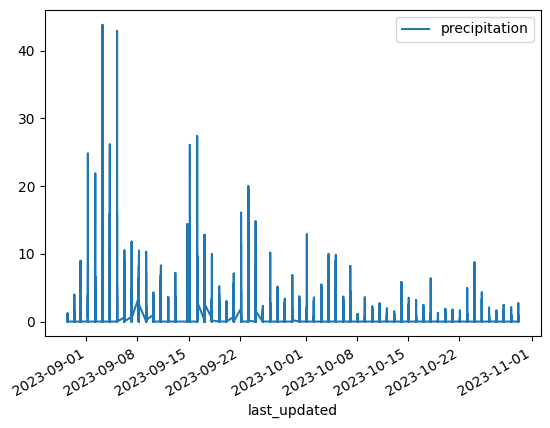

In [37]:
core_weather[["precipitation"]].plot()

In [41]:
core_weather.groupby(core_weather.index.month).sum()["precipitation"] # type: ignore

last_updated
8      175.70
9     5869.65
10    1274.11
Name: precipitation, dtype: float64

In [44]:
core_weather["target"] = core_weather.shift(-1)["temperature"]

In [45]:
core_weather

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility,target
last_updated,,,,,,,,,
2023-08-29 10:45:00,27.5,0.00,20.5,29.77,67,26,29.7,10.0,27.5
2023-08-29 10:45:00,27.5,0.00,15.5,29.78,70,19,30.0,10.0,26.3
2023-08-29 10:45:00,26.3,0.00,18.4,29.78,70,51,28.2,10.0,25.6
2023-08-29 10:45:00,25.6,0.00,16.9,29.80,76,65,27.6,10.0,27.2
2023-08-29 10:45:00,27.2,0.00,16.2,29.79,74,82,29.9,10.0,25.9
...,...,...,...,...,...,...,...,...,...
2023-10-30 02:00:00,22.0,0.00,3.6,29.97,69,0,24.0,2.3,18.4
2023-10-30 02:00:00,18.4,0.00,4.0,29.93,84,4,18.4,10.0,23.1
2023-10-30 02:00:00,23.1,0.00,4.0,29.85,92,60,25.4,10.0,24.3


In [47]:
core_weather = core_weather.iloc[:-1,:].copy()

In [48]:
core_weather

,temperature,precipitation,wind,pressure,humidity,cloud,feels_like,visibility,target
last_updated,,,,,,,,,
2023-08-29 10:45:00,27.5,0.00,20.5,29.77,67,26,29.7,10.0,27.5
2023-08-29 10:45:00,27.5,0.00,15.5,29.78,70,19,30.0,10.0,26.3
2023-08-29 10:45:00,26.3,0.00,18.4,29.78,70,51,28.2,10.0,25.6
2023-08-29 10:45:00,25.6,0.00,16.9,29.80,76,65,27.6,10.0,27.2
2023-08-29 10:45:00,27.2,0.00,16.2,29.79,74,82,29.9,10.0,25.9
...,...,...,...,...,...,...,...,...,...
2023-10-30 02:00:00,23.4,0.04,10.1,29.86,81,82,25.4,10.0,22.0
2023-10-30 02:00:00,22.0,0.00,3.6,29.97,69,0,24.0,2.3,18.4
2023-10-30 02:00:00,18.4,0.00,4.0,29.93,84,4,18.4,10.0,23.1


In [50]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [61]:
predictors = ["temperature", "feels_like"]

In [62]:
train = core_weather.sort_index().loc[:"2023-10-15 02:30:00"]

In [65]:
test = core_weather.sort_index().loc["2023-10-16 02:30:00"]

In [64]:
reg.fit(train[predictors], train["target"]) # type: ignore

Ridge(alpha=0.1)

In [66]:
predictions = reg.predict(test[predictors]) # type: ignore

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
mean_absolute_error(test["target"], predictions)

2.4556978153377504

In [72]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [73]:
combined

,actual,predictions
last_updated,,
2023-10-16 02:30:00,22.9,24.511447
2023-10-16 02:30:00,23.8,22.850064
2023-10-16 02:30:00,25.1,23.222861
2023-10-16 02:30:00,25.2,23.767877
2023-10-16 02:30:00,23.9,23.683793
...,...,...
2023-10-16 02:30:00,26.0,22.982771
2023-10-16 02:30:00,24.2,23.904635
2023-10-16 02:30:00,25.2,23.269460


In [80]:
reg.coef_

array([0.22286691, 0.21274016])

In [81]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.sort_index().loc[:"2023-10-15 02:30:00"]
    test = core_weather.sort_index().loc["2023-10-16 02:30:00"]
    reg.fit(train[predictors], train["target"]) # type: ignore
    predictions = reg.predict(test[predictors]) # type: ignore
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [84]:
create_predictions (predictors, core_weather, Ridge(alpha=.1))

(2.4390950653162418,
                      actual  predictions
 last_updated                            
 2023-10-16 02:30:00    22.9    25.231037
 2023-10-16 02:30:00    23.8    23.520953
 2023-10-16 02:30:00    25.1    23.910345
 2023-10-16 02:30:00    25.2    24.464125
 2023-10-16 02:30:00    23.9    24.393804
 ...                     ...          ...
 2023-10-16 02:30:00    26.0    23.665020
 2023-10-16 02:30:00    24.2    24.631938
 2023-10-16 02:30:00    25.2    23.972219
 2023-10-16 02:30:00    23.2    25.021331
 2023-10-16 02:30:00    27.1    24.317547
 
 [542 rows x 2 columns])